####Perform a Text Classification on consumer complaint dataset
(https://catalog.data.gov/dataset/consumer-complaint-database) into following categories.
0 Credit reporting, repair, or other

1 Debt collection

2 Consumer Loan

3 Mortgage

###**Explanatory Data Analysis and Feature Engineering**
Importing Data and Libraries

In [2]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph.
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [3]:
!pip install requests

In [4]:
import requests
import zipfile
import io

# URL of the ZIP file
zip_url = "https://files.consumerfinance.gov/ccdb/complaints.csv.zip"

# Send an HTTP GET request to download the ZIP file
response = requests.get(zip_url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the ZIP file
    with zipfile.ZipFile(io.BytesIO(response.content)) as zip_file:
        # Assuming there is only one CSV file in the ZIP archive
        csv_file = zip_file.namelist()[0]
        # Extract the CSV file
        zip_file.extract(csv_file)

        # Now you can work with the extracted CSV file
        # For example, load it into a pandas DataFrame
        import pandas as pd
        df = pd.read_csv(csv_file)

        # Display the first few rows of the DataFrame
        print(df.head())
else:
    print("Failed to download the ZIP file.")


<ipython-input-4-7511d65edcb2>:23: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


  Date received                                            Product  \
0    2023-07-22  Credit reporting, credit repair services, or o...   
1    2023-08-25  Credit reporting or other personal consumer re...   
2    2023-08-24  Credit reporting, credit repair services, or o...   
3    2023-08-25  Credit reporting or other personal consumer re...   
4    2023-08-23  Credit reporting, credit repair services, or o...   

                      Sub-product  \
0                Credit reporting   
1                Credit reporting   
2                Credit reporting   
3                Credit reporting   
4  Other personal consumer report   

                                               Issue  \
0               Incorrect information on your report   
1               Incorrect information on your report   
2  Problem with a credit reporting company's inve...   
3                        Improper use of your report   
4               Incorrect information on your report   

                   

In [35]:
df.shape

(4101381, 18)

####We have more than 1 million instances (rows) and 18 features (columns).

In [5]:
import pandas as pd

# Assuming you've already downloaded the ZIP file and extracted it to a CSV file
# If not, please refer to the previous code example

# Specify the path to the extracted CSV file
csv_file_path = "complaints.csv"  # Replace with the actual file path

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Now, you can work with the DataFrame 'df' as needed
# For example, you can display the first few rows of the DataFrame
print(df.head())

<ipython-input-5-7340984a123f>:10: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


  Date received                                            Product  \
0    2023-07-22  Credit reporting, credit repair services, or o...   
1    2023-08-25  Credit reporting or other personal consumer re...   
2    2023-08-24  Credit reporting, credit repair services, or o...   
3    2023-08-25  Credit reporting or other personal consumer re...   
4    2023-08-23  Credit reporting, credit repair services, or o...   

                      Sub-product  \
0                Credit reporting   
1                Credit reporting   
2                Credit reporting   
3                Credit reporting   
4  Other personal consumer report   

                                               Issue  \
0               Incorrect information on your report   
1               Incorrect information on your report   
2  Problem with a credit reporting company's inve...   
3                        Improper use of your report   
4               Incorrect information on your report   

                   

In [36]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-07-22,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"Nelnet, Inc.",IL,61103,NaN,NaN,Web,2023-08-23,Closed with explanation,Yes,NaN,7284490
1,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",FL,33444,NaN,NaN,Web,2023-08-25,Closed with non-monetary relief,Yes,NaN,7588176
2,2023-08-24,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Was not notified of investigation status or re...,NaN,NaN,Experian Information Solutions Inc.,NJ,07024,NaN,Other,Web,2023-08-24,In progress,Yes,NaN,7452639
3,2023-08-25,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"SANTANDER HOLDINGS USA, INC.",FL,33972,NaN,NaN,Web,2023-08-25,Closed with explanation,Yes,NaN,7512160
4,2023-08-23,"Credit reporting, credit repair services, or o...",Other personal consumer report,Incorrect information on your report,Information that should be on the report is mi...,NaN,NaN,LEXISNEXIS,FL,32258,NaN,Other,Web,2023-08-23,In progress,Yes,NaN,7442688


In [6]:
import pandas as pd

# Specify the data types for columns with mixed types
dtype_mapping = {
    'Column1': 'str',  # Replace 'Column1' with the actual column name
    'Column2': 'int',  # Replace 'Column2' with the actual column name
    # Add more columns and their respective data types as needed
}

# Assuming you've already downloaded and loaded the CSV file
# Specify the path to the CSV file
csv_file_path = "complaints.csv"  # Replace with the actual file path

# Load the CSV file into a pandas DataFrame with specified data types
df = pd.read_csv(csv_file_path, dtype=dtype_mapping)


<ipython-input-6-f103a4aa4f57>:15: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path, dtype=dtype_mapping)


####Columns are shown in rows for easy reading

In [7]:
df.head(2).T

,0,1
Date received,2023-07-22,2023-08-25
Product,"Credit reporting, credit repair services, or o...",Credit reporting or other personal consumer re...
Sub-product,Credit reporting,Credit reporting
Issue,Incorrect information on your report,Incorrect information on your report
Sub-issue,Information belongs to someone else,Information belongs to someone else
Consumer complaint narrative,NaN,NaN
Company public response,NaN,NaN
Company,"Nelnet, Inc.","EQUIFAX, INC."
State,IL,FL
ZIP code,61103,33444


####*The dataset contains features that are not necessary to solve our multi-classification problem. For this text classification problem, we are going to build another dataframe that contains ‘Product’ and ‘Consumer complaint narrative’ (renamed as 'Consumer_complaint').*

In [8]:
# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint']

df1.shape

(1485598, 2)

In [9]:
df1.head(15)

,Product,Consumer_complaint
10,Checking or savings account,Citibank allowed debit card transactions to ov...
12,"Credit reporting, credit repair services, or o...",I submitted a letter to the XXXX Credit Bureau...
16,"Credit reporting, credit repair services, or o...","Hi, I can't believe you guys are taking advant..."
19,"Credit reporting, credit repair services, or o...","When I reviewed my credit report, I discovered..."
31,"Credit reporting, credit repair services, or o...","On XX/XX/, 2023, XXXX XXXX admitted liability ..."
32,"Credit reporting, credit repair services, or o...",In accordance with the Fair Credit Reporting a...
34,"Credit reporting, credit repair services, or o...",XX/XX/XXXX ] [ XXXX XXXX XXXX ] [ XXXX XXXX XX...
37,"Credit reporting, credit repair services, or o...",In accordance with the Fair Credit Reporting a...
42,Credit card or prepaid card,"On XX/XX/, 2023 my Navy Federal credit card Fl..."
43,"Credit reporting, credit repair services, or o...","Recently reviewed my credit, many unknown unre..."


In [10]:
# Percentage of complaints with text
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

36.2

*from more than 1 million complaints, there are about 1485598 cases with text (~ 36% of the original dataset is not null). This is still a good number to work with. Now let's have a look at the categories we want to classify each complaint.*

In [11]:
pd.DataFrame(df.Product.unique()).values

array([['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Credit reporting or other personal consumer reports'],
       ['Student loan'],
       ['Checking or savings account'],
       ['Debt collection'],
       ['Mortgage'],
       ['Credit card or prepaid card'],
       ['Credit card'],
       ['Money transfer, virtual currency, or money service'],
       ['Payday loan, title loan, personal loan, or advance loan'],
       ['Vehicle loan or lease'],
       ['Prepaid card'],
       ['Debt or credit management'],
       ['Payday loan, title loan, or personal loan'],
       ['Bank account or service'],
       ['Consumer Loan'],
       ['Credit reporting'],
       ['Money transfers'],
       ['Payday loan'],
       ['Other financial service'],
       ['Virtual currency']], dtype=object)

####*There are 18 different classes or categories (target). However; it is observed that some classes are contained in others. For instance, ‘Credit card’ and ‘Prepaid card’ are contained in ‘Credit card or prepaid card’ category. Now, imagine there is a new complaint about Credit card and we want to classify it. The algorithm can either classify this complaint as 'Credit card' or 'Credit card or prepaid' and it would be correct. Nevertheless, this would affect model performance. In order to avoid this problem, the names of some categories were renamed.*
[ ]


In [12]:
# Because the computation is time consuming (in terms of CPU), the data was sampled
df2 = df1.sample(10000, random_state=1).copy()

In [13]:
# Renaming categories
df2.replace({'Product':
             {'Credit reporting, credit repair services, or other personal consumer reports':
              'Credit reporting, repair, or other',
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}},
            inplace= True)

In [44]:
pd.DataFrame(df2.Product.unique())

,0
0,Mortgage
1,Debt collection
2,"Credit reporting, repair, or other"
3,Student loan
4,"Payday loan, title loan, or personal loan"
5,"Money transfer, virtual currency, or money ser..."
6,Checking or savings account
7,Credit card or prepaid card
8,Bank account or service
9,Vehicle loan or lease




* Now we need to represent each class as a number, so as our predictive model can better understand the different categories.

In [45]:
# Create a new column 'category_id' with encoded categories
df2['category_id'] = df2['Product'].factorize()[0]
category_id_df = df2[['Product', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
df2.head()

,Product,Consumer_complaint,category_id
1478466,Mortgage,LoanDepot has failed to deliver my escrow bala...,0
302862,Debt collection,Both the collections accounts on my report or ...,1
1165070,"Credit reporting, repair, or other",My name is XXXX XXXX this complaint is not mad...,2
2387392,Mortgage,XXXX/XXXX/2014Honorable XXXX XXXX : Hello. I w...,0
1014314,"Credit reporting, repair, or other",I discovered that some of the information on m...,2


The bar chart below shows the number of complaints per category. It can be observed that The bar chart below shows the number of complaints per category. It can be observed that most of customer complaints are due to:

* credit reporting, credit repair

* debt collection

* mortgage

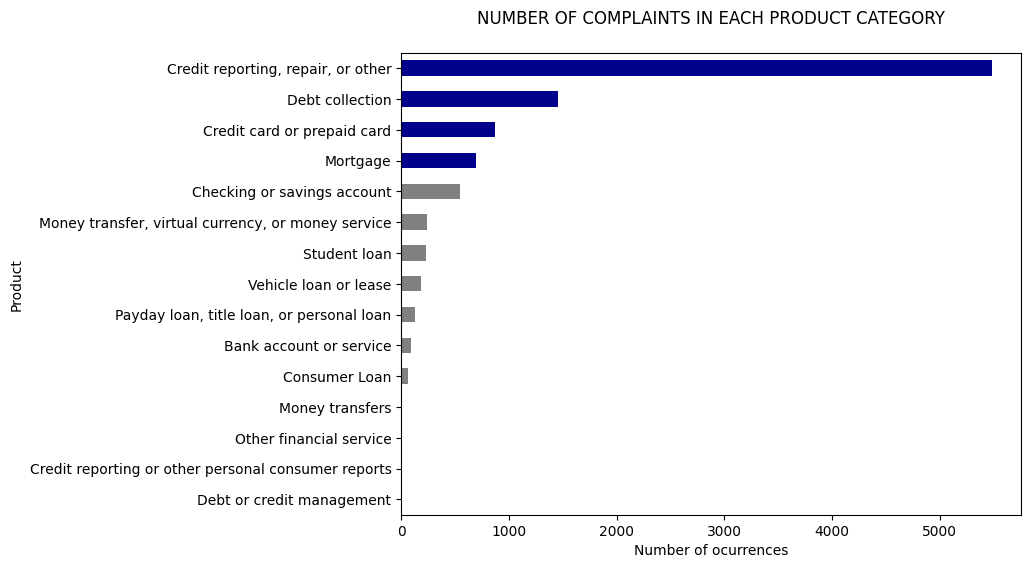

In [46]:
fig = plt.figure(figsize=(8,6))
colors = ['darkblue','darkblue','grey','grey','grey','grey','grey','grey','grey',
    'grey','grey','darkblue','darkblue']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

##**Text Preprocessing**
The text needs to be transformed to vectors so as the algorithms will be able make predictions. In this case it will be used the Term Frequency – Inverse Document Frequency (TFIDF) weight to evaluate how important a word is to a document in a collection of documents.

After removing punctuation and lower casing the words, importance of a word is determined in terms of its frequency.

###*“Term Frequency – Inverse Document Frequency*
TF - IDF is the product of the TF and IDF scores of the term.
**TF - IDF = TF / IDF**
Term Frequency : This summarizes how often a given word appears within a document.*

TF = Number of times the term appears in the docTotal number of words in the doc

Inverse Document Frequency: This downscales words that appear a lot across documents. A term has a high IDF score if it appears in a few documents. Conversely, if the term is very common among documents (i.e., “the”, “a”, “is”), the term would have a low IDF score.

*IDF = ln (Number of docsNumber docs the term appears in)*

TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The higher the TFIDF score, the rarer the term is. For instance, in a Mortgage complaint the word mortgage would be mentioned fairly often. However, if we look at other complaints, mortgage probably would not show up in many of them. We can infer that mortgage is most probably an important word in Mortgage complaints as compared to the other products. Therefore, mortgage would have a high TF-IDF score for Mortgage complaints.

###TfidfVectorizer class can be initialized with the following parameters:
* min_df: remove the words from the vocabulary which have occurred in less than ‘min_df’ number of files.
* max_df: remove the words from the vocabulary which have occurred in more than _‘maxdf’ * total number of files in corpus.
* sublinear_tf: set to True to scale the term frequency in logarithmic scale.
* stop_words: remove the predefined stop words in 'english'.
use_idf: weight factor must use inverse document frequency.
ngram_range: (1, 2) to indicate that unigrams and bigrams will be considered.

In [17]:

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 complaints is represented by 26010 features (TF-IDF score of unigrams and bigrams)


###*Finding the three most correlated terms with each of the product categories*

In [18]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))



==> Bank account or service:
  * Most Correlated Unigrams are: branch, 2016, overdraft
  * Most Correlated Bigrams are: xxxx 2016, deposited check, promotion code

==> Checking or savings account:
  * Most Correlated Unigrams are: overdraft, branch, checking
  * Most Correlated Bigrams are: overdraft fees, savings account, checking account

==> Consumer Loan:
  * Most Correlated Unigrams are: finance, car, avant
  * Most Correlated Bigrams are: separate accounts, calling times, toyota financial

==> Credit card or prepaid card:
  * Most Correlated Unigrams are: citi, cards, card
  * Most Correlated Bigrams are: card company, american express, credit card

==> Credit reporting or other personal consumer reports:
  * Most Correlated Unigrams are: surrendered, wage, laugh
  * Most Correlated Bigrams are: collection charge, thank immediate, theft taken

==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: report, section, reporting
  * Most Correlated Bigrams are: cre

###**Multi-Class Classifier: Features and Design**

In [47]:
X = df2['Consumer_complaint'] # Collection of documents
y = df2['Product'] # Target or the labels we want to predict (i.e., the 15 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state = 0)


###**Selection of Multiclassification model**

We are now ready to experiment with different machine learning models, evaluate their accuracy and find the source of any potential issues.

We will benchmark the following four models:

* Logistic Regression
* (Multinomial) Naive Bayes
* Linear Support Vector Machine
* Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale 

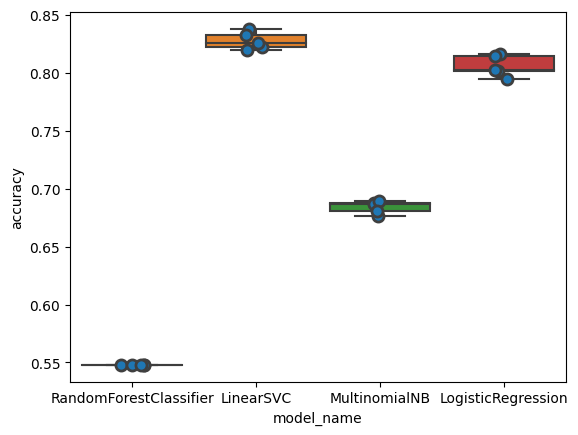

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df,
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

###**Comparison of Model Performance**

In [48]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.8276
LogisticRegression        0.8060
MultinomialNB             0.6841
RandomForestClassifier    0.5480
Name: accuracy, dtype: float64

LinearSVC and Logistic Regression perform better than the other two classifiers, with LinearSVC having a slight advantage with a median accuracy of around 82%.

###**Model Evaluation**

*Continue with our best model (LinearSVC), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.*

In [50]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features,
                                                               labels,
                                                               df2.index, test_size=0.25,
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

###*Precision, Recall, F1-score*

In [51]:
from sklearn import metrics
import numpy as np

# Identify the unique classes in your true labels (y_test)
unique_classes = np.unique(y_test)

# Convert the NumPy integer array to a list of strings
unique_classes_str = [str(c) for c in unique_classes]

# Provide the correct target_names parameter
print(metrics.classification_report(y_test, y_pred, target_names=unique_classes_str))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       157
           1       0.76      0.70      0.73       383
           2       0.88      0.94      0.91      1386
           3       0.84      0.73      0.78        49
           4       0.91      0.29      0.43        35
           5       0.76      0.61      0.68        64
           6       0.71      0.72      0.71       137
           7       0.69      0.70      0.70       200
           8       0.50      0.05      0.10        19
           9       0.55      0.46      0.50        50
          10       0.00      0.00      0.00        17
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         1

    accuracy                           0.82      2500
   macro avg       0.57      0.47      0.49      2500
weighted avg       0.81      0.82      0.81      2500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Confusion Matrix**

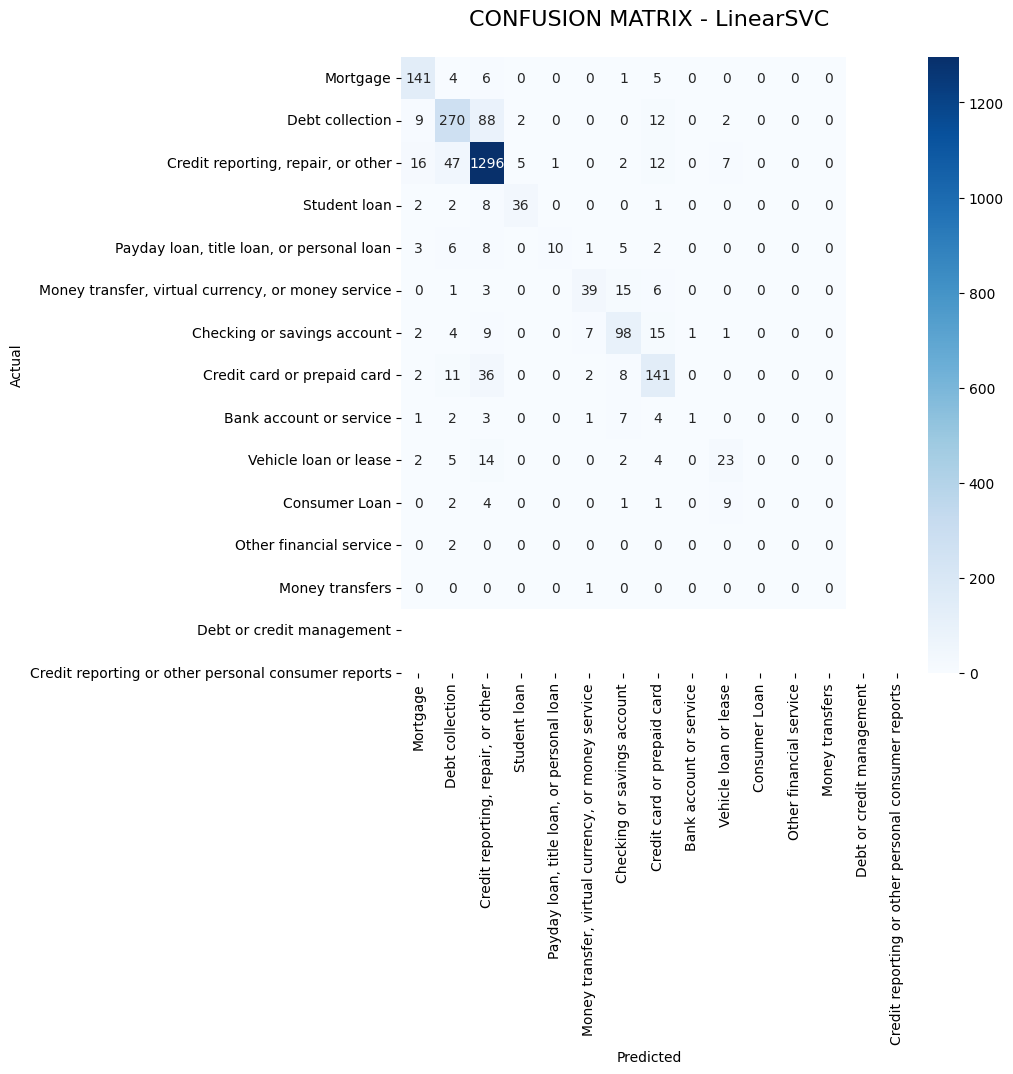

In [52]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values,
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In [28]:
for actual in range(13):  # Assuming you have 13 classes
    for predicted in range(13):
        if predicted != actual and conf_mat[actual, predicted] >= 20:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))



'Debt collection' predicted as 'Credit reporting, repair, or other' : 88 examples.
'Credit reporting, repair, or other' predicted as 'Debt collection' : 47 examples.
'Credit card or prepaid card' predicted as 'Credit reporting, repair, or other' : 36 examples.


In [29]:
for actual in range(13):  # Assuming you have 13 classes
    for predicted in range(13):
        if predicted != actual and conf_mat[actual, predicted] >= 20:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual],
                                                                 id_to_category[predicted],
                                                                 conf_mat[actual, predicted]))

            display(df2.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint']])
            print('')


'Debt collection' predicted as 'Credit reporting, repair, or other' : 88 examples.


,Product,Consumer_complaint
1099260,Debt collection,I am filing the complaint against CREDIT CONTR...
1891304,Debt collection,"XXXX XXXX, XXXX is trying to garnish my check ..."
926595,Debt collection,Evaluate this reporting by making a revision o...
4070012,Debt collection,I have tried numerous times to remove this fra...
1715137,Debt collection,XXXX is reporting and collecting to collect wr...
...,...,...
1827177,Debt collection,The following account is inaccurate and fraudu...
639862,Debt collection,This company has failed to remove this from my...
960347,Debt collection,They would call three times a day for a month ...
3413819,Debt collection,I have tried to fix the situation with this co...



'Credit reporting, repair, or other' predicted as 'Debt collection' : 47 examples.


,Product,Consumer_complaint
2847460,"Credit reporting, repair, or other",XX/XX/2020 the debt was paid in full. My attem...
1779281,"Credit reporting, repair, or other",Experian is reporting Unverified information o...
586107,"Credit reporting, repair, or other",I have sent 3 letters requesting validation of...
2139226,"Credit reporting, repair, or other",We have closed the collection with XXXX group ...
683555,"Credit reporting, repair, or other",XXXX XXXX XXXX recently placed a collection on...
1029764,"Credit reporting, repair, or other",I submitted a request to validate a debt. I di...
1733348,"Credit reporting, repair, or other",XXXX account was placed on debt management pro...
1535363,"Credit reporting, repair, or other",I have tried several times to settle this matt...
1377285,"Credit reporting, repair, or other",Account opened on XX/XX/2015. There is not dat...
226881,"Credit reporting, repair, or other",On XX/XX/2015 a credit card account with XXXX ...



'Credit card or prepaid card' predicted as 'Credit reporting, repair, or other' : 36 examples.


,Product,Consumer_complaint
789287,Credit card or prepaid card,Discover Credit Operations Team XXXX Applicati...
2246357,Credit card or prepaid card,Good afternoon I'm writing in reference to a c...
2358948,Credit card or prepaid card,It is truly absurd to witness late payments re...
1102519,Credit card or prepaid card,I notice someone open a credit card in my name...
249080,Credit card or prepaid card,Capital one did not address the issue. the iss...
973099,Credit card or prepaid card,1st off I would like to say thank you for givi...
883907,Credit card or prepaid card,HJR 192 72 10 USC 15 SEC. 1681 The government ...
2517820,Credit card or prepaid card,To whom it may concern I [ XXXX XXXX ] a natur...
1704383,Credit card or prepaid card,I have been sent numerous emails from credit k...
436918,Credit card or prepaid card,I am the original creditor of the account in q...


In [30]:
model.fit(features, labels)

N = 4
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("\n==> '{}':".format(Product))
  print("  * Top unigrams: %s" %(', '.join(unigrams)))
  print("  * Top bigrams: %s" %(', '.join(bigrams)))


==> 'Bank account or service':
  * Top unigrams: 2016, bank, promotion, branch
  * Top bigrams: deposited check, xx 2016, letter send, xxxx 2016

==> 'Checking or savings account':
  * Top unigrams: bank, checking, account, chime
  * Top bigrams: checking account, response company, money account, access account

==> 'Consumer Loan':
  * Top unigrams: avant, finance, upload, thank
  * Top bigrams: paying monthly, supposed removed, history xxxx, calling times

==> 'Credit card or prepaid card':
  * Top unigrams: card, discover, capital, citi
  * Top bigrams: credit card, late fees, minimum payment, balance transfer

==> 'Credit reporting or other personal consumer reports':
  * Top unigrams: drive, wage, pandemic, protections
  * Top bigrams: theft taken, collection charge, wage garnishment, xxxx husband

==> 'Credit reporting, repair, or other':
  * Top unigrams: experian, equifax, transunion, report
  * Top bigrams: xxxx xxxx, xxxx reporting, late payments, account applied

==> 'Debt 

###Prediction

* Now let's make a few predictions on unseen data.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state = 0)
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

* Let's see what is the classification that our model gives to this new complaint.

In [32]:
new_complaint = """I have been enrolled back at XXXX XXXX University in the XX/XX/XXXX. Recently, i have been harassed by \
Navient for the last month. I have faxed in paperwork providing them with everything they needed. And yet I am still getting \
phone calls for payments. Furthermore, Navient is now reporting to the credit bureaus that I am late. At this point, \
Navient needs to get their act together to avoid me taking further action. I have been enrolled the entire time and my \
deferment should be valid with my planned graduation date being the XX/XX/XXXX."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))


['Student loan']


* The algorithm has classified this text correctly as a "Student loan" complaint.